In [1]:
!pip install ctgan
!pip install table-evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%cd synthesizers
! ls

[Errno 2] No such file or directory: 'synthesizers'
/content
CTGAN  sample_data


In [3]:
from ctgan import load_demo
real_data = load_demo()
real_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from ctgan import CTGAN
# Identifies all the discrete columns

discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

# Initiates the CTGANSynthesizer and call its fit method to pass in the table
 
ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

#generate synthetic data, 1000 rows of data

synthetic_data = ctgan.sample(1000)
synthetic_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35,Private,38854,Some-college,14,Divorced,?,Unmarried,White,Female,134,2,40,United-States,<=50K
1,22,Private,68413,Assoc-acdm,10,Never-married,Adm-clerical,Not-in-family,White,Female,3403,2028,40,United-States,>50K
2,40,Private,258264,11th,7,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Female,135,8,62,United-States,>50K
3,14,Private,175876,Doctorate,9,Married-civ-spouse,Prof-specialty,Not-in-family,White,Female,144,5,40,United-States,<=50K
4,19,Private,47977,10th,9,Never-married,Prof-specialty,Own-child,White,Male,-51,-2,40,United-States,<=50K


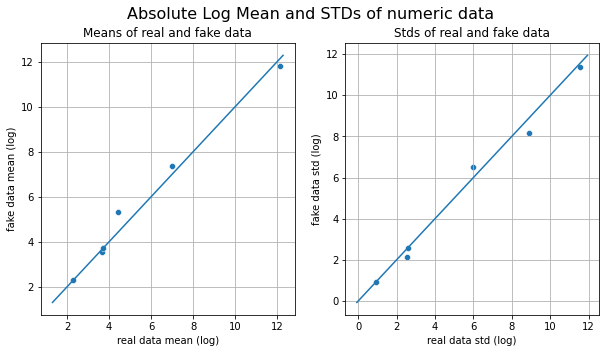

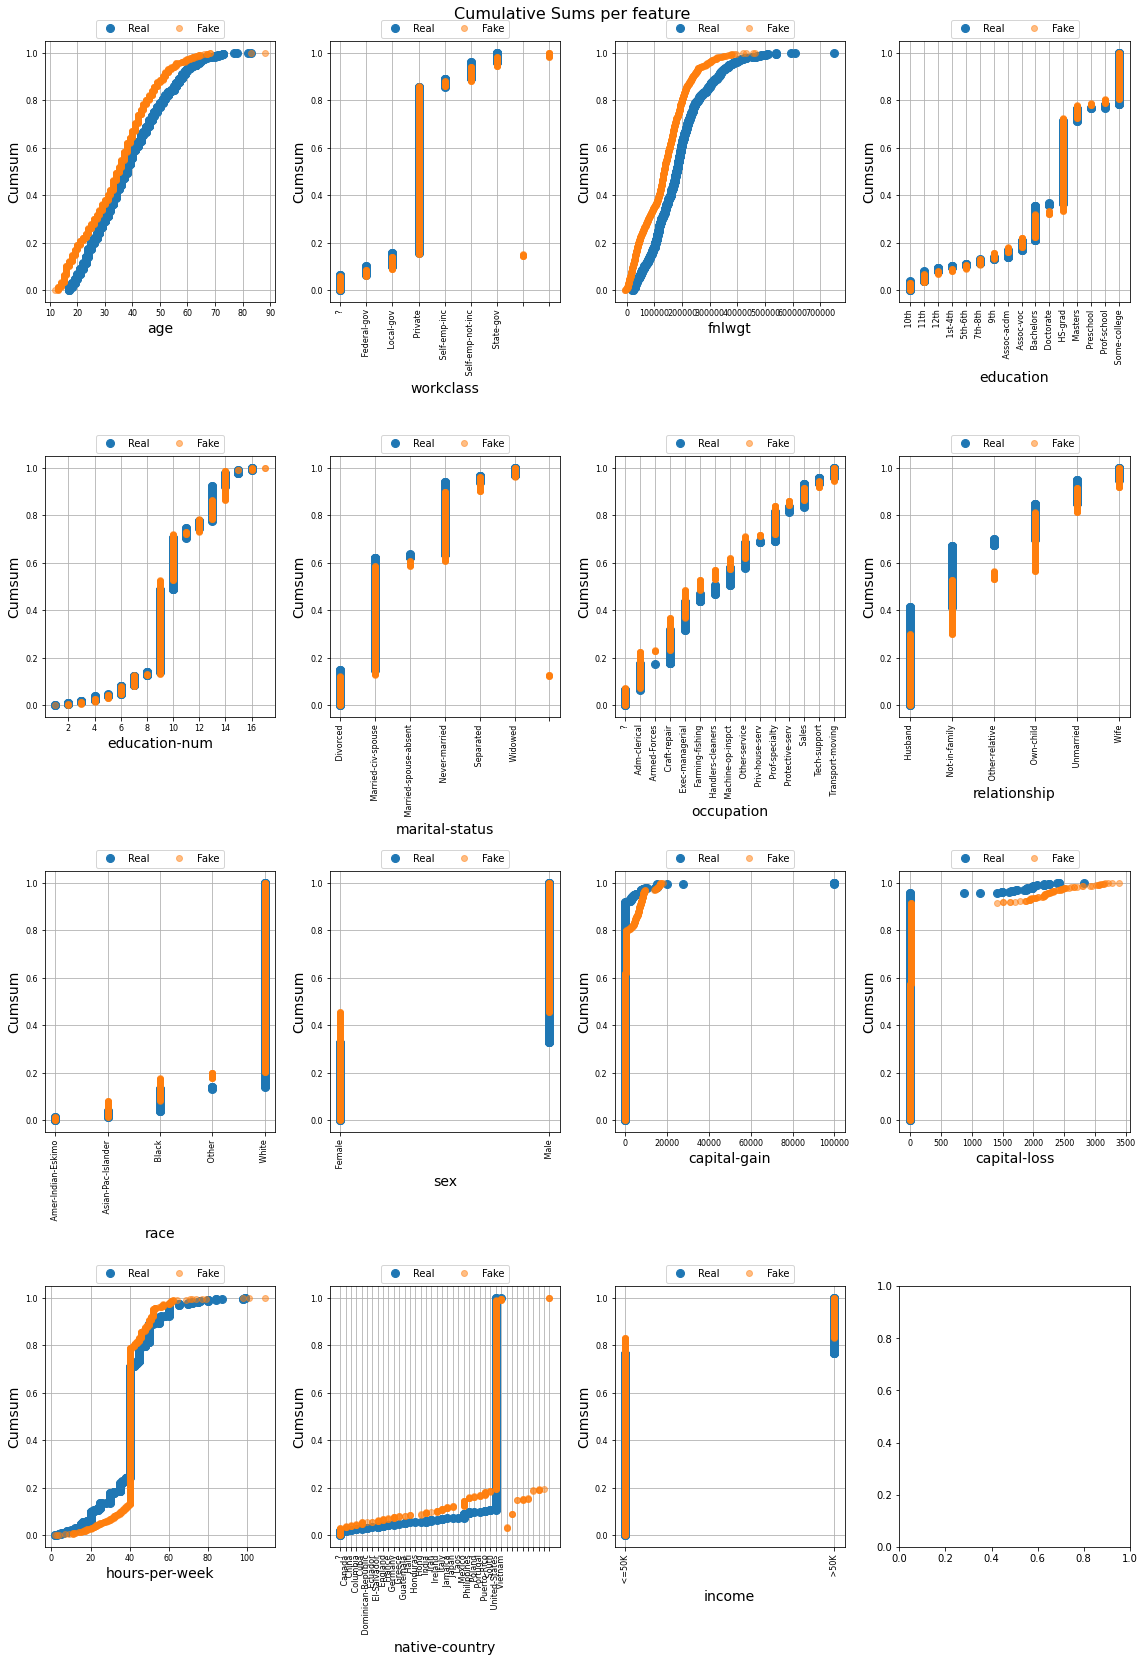

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

In [6]:
table_evaluator.evaluate(target_col='education')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2350   0.2400              0.1111
DecisionTreeClassifier_real   1.0000   0.1500              0.0811
LogisticRegression_fake       0.3850   0.4250              0.7021
LogisticRegression_real       0.3200   0.3200              0.9048
MLPClassifier_fake            0.1650   0.0350              0.0899
MLPClassifier_real            0.2650   0.0050              0.0309
RandomForestClassifier_fake   0.2650   0.3650              0.2048
RandomForestClassifier_real   0.8300   0.2550              0.1628

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    2.9089
nearest neighbor std                     0.6046

Miscellaneous results:
                                  Result
Column Cor